In [193]:
import numpy as np
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

## Ejercicio 1

p_nueva_solicitud = 1/40, p_procesada = 1/30  
Para la representación de estados se debe tener en cuenta la cantidad de solicitudes que fueron
encoladas y no procesadas. Por lo tanto se representa un estado para cada una de estas situaciones.
Por ejemplo: el sistema puede estar procesando una solicitud teniendo otra encolada. En este caso 
sistema se encuentra en estado P1E (procesando con una solicitud encolada), si llega una nueva solicitud
con p = 1/40 pasa a P2E, en cambio si esprocesada con p = 1/30 pasa a P0E, y asi siguiendo...La probabilidad
de permanecer en un estado PiE es p = 1 - (1/40 + 1/30) = 113/120.

TODO: Subir un dibujito como queda el diagrama de estados.

#### a. Matriz de transición
La matriz de transición de estados esta dada por la probabilidad que el sistema tiene de pasar de un estado al otro.  
Con los estados: SP (sin procesar), PiE (procesando con i encolados, i en Naturales).

#### La matriz de transición resulta:

[ 39/40  1/40       0         0      0   0    0   ... ]  
[ 1/30   113/120  1/40        0      0   0    0   ... ]  
[ 0      1/30     113/120    1/40    0   0    0   ... ]  
....

#### b. Simular 1000 s, Eo = SP, 30 estados posibles.
30 estados posibles, por lo tanto los estados serán: SP, P0E ... P28E.

In [194]:
# Armo la matriz de transición
p_nueva_solicitud = 1/40
p_procesada = 1/30
p_mantenerse = 1 - (p_procesada + p_nueva_solicitud)

aux = [p_procesada, p_mantenerse, p_nueva_solicitud]
M = []
for i in range(30):
    if i == 0:
        fila = [(1 - p_nueva_solicitud), p_nueva_solicitud] + [0 for x in range(28)]
    elif i == 29:
        fila = [0 for x in range(28)] + [p_procesada, (1 - p_procesada)]
    else:
        fila = [0 for x in range(i-1)] + aux + [0 for x in range(30 - (i + 2))]
    M.append(fila)

len(M)

30

In [195]:
import random
random.seed(10)

def index_p(x, n):
    i = 0
    acc = 0
    for v in x:
        if v != 0:
            acc += v
            if n < acc:
                return i
        i+=1

def state_from_v(x):
    return ESTADOS[x.index(1)]
        
def v_from_index(i):
    aux = [0] * 30
    aux[i] = 1
    return aux

ITERACIONES = 100000
ESTADOS = ['SP'] + ['P{}E'.format(x) for x in range(29)]
COUNT_ESTADOS = {}
SOLICITUDES = []
x = v_from_index(0) # Comienza en Sin Procesar.

for i in range(ITERACIONES):
    result = np.dot(x, M)
    index = index_p(result, random.random())
    x = v_from_index(index)
    # Estadisticas
    next_state = state_from_v(x)
    COUNT_ESTADOS[next_state] = COUNT_ESTADOS.get(next_state, 0) + 1
    SOLICITUDES.append(index)

#### c.

In [212]:
# Cantidad de solicitudes en cada instante de tiempo.
figure(figsize=(1410), dpi=80)
plt.plot(SOLICITUDES)

TypeError: from_bounds() argument after * must be an iterable, not int

#### D.

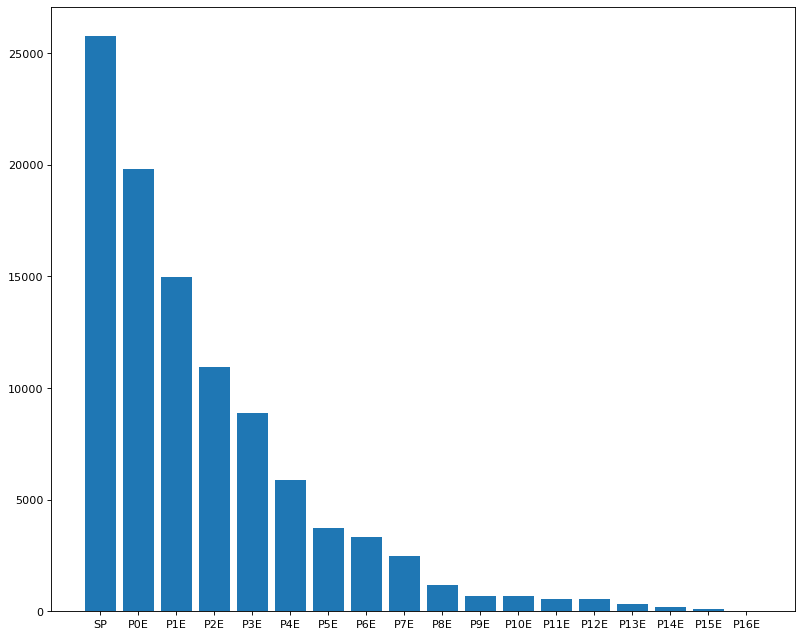

In [210]:
# Histograma por estado.
figure(figsize=(12,10), dpi=80)

plt.bar(list(COUNT_ESTADOS.keys()), COUNT_ESTADOS.values())
plt.show()

#### e. % de Tiempo en el estado Sin Procesar (SP)

In [198]:
(COUNT_ESTADOS['SP'] / sum(COUNT_ESTADOS.values())) * 100

25.759999999999998


## Ejercicio 2

#### a. calcular los puntos de equilibrio

Planteamos las ecuaciones en equilibrio.  
xt = xt-1 = xeq = x; yt = yt-1 = yeq = y; zt = zt-1 = zeq = z  
las reglas quedan entonces:  
x = x / 2 + y  
y = y - x /2  
z = z - x - y  

A priori P1 = (0, 0, 0) es un punto de equilibrio. Se observa también que para cualquier z, 
tomando x = 0, y = 0, son puntos de equilibrio.

Rta: p (x, y, z) / x = 0, y = 0, para todo z en R.

#### b. Graficar el diagrama de fases mostrando 100 iteraciones del sistema.

In [199]:
P = [-1, 0, 1]
puntos_de_inicio = []
for x in P:
    for y in P:
        for z in P:
            puntos_de_inicio.append([x, y, z])

In [200]:
# Simulamos 100 iteraciones con cada punto de inicio.
total_sim = []
for p_inicio in puntos_de_inicio:
    x_sim, y_sim, z_sim = [], [], []
    x, y, z = p_inicio
    x_sim.append(x)
    y_sim.append(y)
    z_sim.append(z)
    for i in range (0, 100):
        x, y, z = [x_sim[i], y_sim[i], z_sim[i]]
        x_t = x / 2 + y
        y_t = y - x / 2
        z_t = z - (x + y)
        x_sim.append(x_t)
        y_sim.append(y_t)
        z_sim.append(z_t)
        
    total_sim.append([x_sim, y_sim, z_sim])

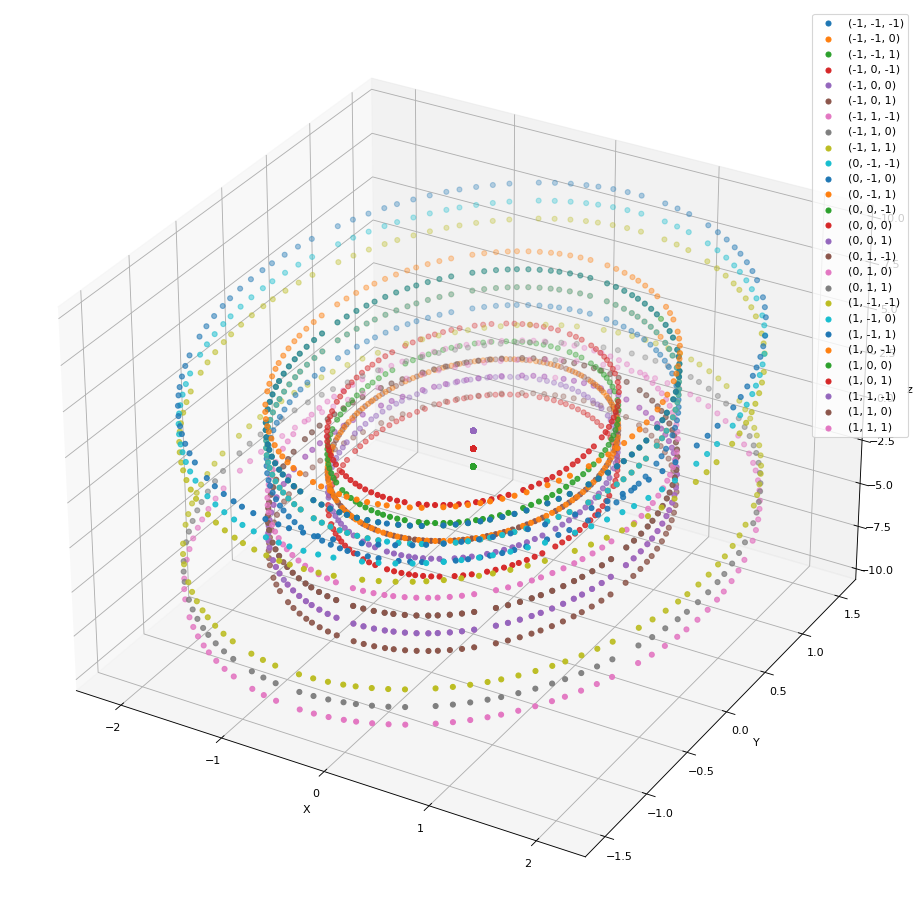

In [206]:
# Si bien es un sistema discreto, realizamos un gráfico continuo para visualizar
# aún mejor la evolución del mismo.
figure(figsize=(15,15), dpi=80)
ax = plt.axes(projection='3d')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('z')

for idx, sim in enumerate(total_sim):
    x0, y0, z0 = puntos_de_inicio[idx]
    xline = sim[0]
    yline = sim[1]
    zline = sim[2]
    ax.scatter3D(
        xline, 
        yline, 
        zline,
        label='({}, {}, {})'.format(x0, y0, z0)
    )
    
ax.legend()